# Clustering
This project aims to perform customer segmentation based on transactional and demographic data using a combination of:
- RFM (Recency, Frequency, Monetary) analysis

- Data preprocessing & scaling

- Dimensionality reduction using PCA

- K-Means clustering

- Cluster interpretation & visualization

The goal is to generate meaningful customer segments that can be used for targeted marketing, personalized campaigns, and customer engagement strategies.

## Import dependencies

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

## Load dataset

In [116]:
retail_df = pd.read_pickle('../data/processed/pkl_retail_data_cleaned-v2.pkl')
rfm_df = pd.read_pickle('../data/processed/pkl_rfm_segmnetation.csv')

In [117]:
retail_df[retail_df['Customer_ID'] == 10001.0]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
9772,6592641.0,10001.0,Calvin Brown,Christina64@gmail.com,4.507314e+09,11257 Jennifer Forest,Brighton,England,21143.0,UK,46.0,Male,Low,Regular,2023-03-15,2023.0,March,10:54:28,3.0,122.485913,367.457739,Grocery,Coca-Cola,Soft Drink,Bad,Express,Cash,Delivered,1.0,Grape soda
102493,3875669.0,10001.0,Calvin Brown,Christina64@gmail.com,4.507314e+09,11257 Jennifer Forest,Brighton,England,21143.0,UK,46.0,Male,Low,Regular,2023-10-21,2023.0,October,09:39:40,3.0,323.110099,969.330298,Books,Penguin Books,Fiction,Excellent,Same-Day,PayPal,Shipped,5.0,Adventure
112445,5025854.0,10001.0,Calvin Brown,Christina64@gmail.com,4.507314e+09,11257 Jennifer Forest,Brighton,England,21143.0,UK,46.0,Male,Low,Regular,2023-10-09,2023.0,October,19:26:01,8.0,484.943060,3879.544482,Clothing,Zara,Shirt,Excellent,Same-Day,Cash,Processing,5.0,Tank top
145392,4824050.0,10001.0,Calvin Brown,Christina64@gmail.com,4.507314e+09,11257 Jennifer Forest,Brighton,England,21143.0,UK,46.0,Male,Low,Regular,2023-08-26,2023.0,January,20:10:14,4.0,302.082260,1208.329039,Electronics,Apple,Tablet,Good,Express,Credit Card,Delivered,3.0,iPad
236406,2202795.0,10001.0,Calvin Brown,Christina64@gmail.com,4.507314e+09,11257 Jennifer Forest,Brighton,England,21143.0,UK,46.0,Male,Low,Regular,2023-11-17,2023.0,May,16:14:30,6.0,285.300211,1711.801266,Grocery,Coca-Cola,Juice,Excellent,Express,Debit Card,Shipped,4.0,Pomegranate juice


In [118]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
Customer_ID,,,,,,,,,
10000.0,103,4,5007.566357,2,3,4,234,9,Potential Loyalists
10001.0,105,5,8136.462824,2,4,5,245,11,Loyal Customers
10002.0,95,5,4104.013951,3,4,3,343,10,Loyal Customers
10003.0,228,2,2340.496447,1,1,2,112,4,Hibernating
10004.0,31,2,2356.516683,4,1,2,412,7,At Risk


## Feature selection
### RFM Features

- Recency — Days since last purchase

- Frequency — Number of transactions

- Monetary — Total spending amount

### Demographic & Behavioral Features

- Age

- Gender

- Income level (Low, Medium, High)

- Average Ratings

These features represent customer purchasing behavior and demographics for segmentation.

In [119]:
retail_df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

feature yang akan dipilih : age, income, avg rating, gender, rfm(raw)

In [120]:
df = retail_df.groupby(['Customer_ID'])['Ratings'].mean().reset_index()
df.rename(columns={'Ratings' : 'Avg_Ratings'}, inplace=True)
df.head()


,Customer_ID,Avg_Ratings
0,10000.0,3.5
1,10001.0,3.6
2,10002.0,3.2
3,10003.0,2.5
4,10004.0,3.0


In [121]:
rfm_df.reset_index(inplace=True)

In [122]:
rfm_df.columns

Index(['Customer_ID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFM_Segment', 'RFM_Score', 'Segment'],
      dtype='object')

In [123]:
df = df.merge(rfm_df[['Customer_ID','Recency', 'Frequency', 'Monetary']], on='Customer_ID', how='left')

In [124]:
df.head()

,Customer_ID,Avg_Ratings,Recency,Frequency,Monetary
0,10000.0,3.5,103,4,5007.566357
1,10001.0,3.6,105,5,8136.462824
2,10002.0,3.2,95,5,4104.013951
3,10003.0,2.5,228,2,2340.496447
4,10004.0,3.0,31,2,2356.516683


In [125]:
retail_df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [126]:
df = df.merge(retail_df[['Customer_ID', 'Age', 'Gender', 'Income']], on='Customer_ID', how='right')

In [127]:
df.drop_duplicates(inplace=True)

In [128]:
len(df)

86485

In [129]:
len(rfm_df)

86485

In [130]:
df.to_csv('../data/processed/data_customers.csv')
df.to_pickle('../data/processed/pkl_data_customers.pkl')

## Data Preprocessing

### Check Missing Values, Duplicated Values, And Outliers

In [131]:
df = pd.read_pickle('../data/processed/pkl_data_customers.pkl')
df.head()

,Customer_ID,Avg_Ratings,Recency,Frequency,Monetary,Age,Gender,Income
0,37249.0,3.400000,24,5,6485.389528,19.0,Male,High
1,69749.0,2.800000,1,5,4089.881243,20.0,Male,Low
2,30192.0,4.000000,128,4,7337.481177,19.0,Male,Low
3,62101.0,3.333333,51,3,7936.809742,38.0,Male,High
4,27901.0,1.333333,28,3,1334.931576,22.0,Male,Low


In [132]:
# Check Missing Values
df.isnull().sum()

Customer_ID    0
Avg_Ratings    0
Recency        0
Frequency      0
Monetary       0
Age            0
Gender         0
Income         0
dtype: int64

No missing values

In [133]:
# Check Duplicated data
df.duplicated().sum()

np.int64(0)

No duplicated data

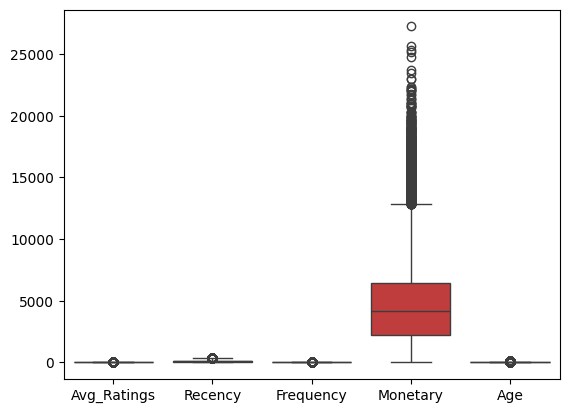

In [134]:
# Check outliers using boxplot
sns.boxplot(data=df[['Avg_Ratings', 'Recency', 'Frequency', 'Monetary', 'Age']])
plt.show()

### Handling Outliers
I applied an remove_outliers_iqr function to remove outlier data using IQR technique

In [135]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

columns = ['Avg_Ratings', 'Recency', 'Frequency', 'Monetary', 'Age']
df_clean = remove_outliers_iqr(df, columns)

In [136]:
print('Data before removing outliers : ', df.shape)
print('Data after removing outliers', df_clean.shape)
df_clean.shape

Data before removing outliers :  (86485, 8)
Data after removing outliers (68250, 8)


(68250, 8)

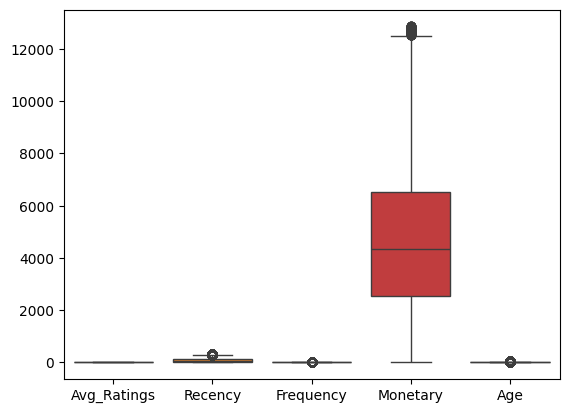

In [137]:
sns.boxplot(data=df_clean[columns])
plt.show()

### Feature Scaling
All numerical features were scaled using StandardScaler

In [138]:
# numeric columns
numeric = ['Avg_Ratings', 'Recency', 'Frequency', 'Monetary', 'Age']

In [139]:
df_clean = df_clean.reset_index(drop=True)

In [140]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[numeric])

In [141]:
df_scaled.shape

(68250, 5)

In [142]:
df_scaled

array([[ 0.32711417, -0.88542621,  0.94508388,  0.63218586, -0.84169191],
       [-0.47709367, -1.19972494,  0.94508388, -0.22350138, -0.60288503],
       [ 1.13132202,  0.53575064,  0.3027363 ,  0.93655715, -0.84169191],
       ...,
       [-1.5493708 ,  1.2326739 , -1.62430644, -1.60830919, -1.08049879],
       [-0.20902439,  2.77683721, -1.62430644, -1.63680726,  0.59114937],
       [ 1.13132202,  1.19167841, -1.62430644, -1.29845872,  2.02399065]],
      shape=(68250, 5))

In [143]:
df_scaled = pd.DataFrame(df_scaled, columns=numeric)
df_scaled.head()

,Avg_Ratings,Recency,Frequency,Monetary,Age
0,0.327114,-0.885426,0.945084,0.632186,-0.841692
1,-0.477094,-1.199725,0.945084,-0.223501,-0.602885
2,1.131322,0.535751,0.302736,0.936557,-0.841692
3,-2.442935,-0.830766,-0.339611,-1.207583,-0.125271
4,0.684540,0.057470,-0.339611,0.840255,-0.602885


### encoding Income columns
Encoding Ordinal data (Income feature) using OrdinalEncoder (Low < Medium < High)

In [144]:
df_clean['Income'].value_counts()

Income
Medium    24438
High      23094
Low       20718
Name: count, dtype: int64

In [145]:
df_clean = df_clean.reset_index(drop=True)

In [146]:
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df_scaled['Income_encoding'] = ordinal_encoder.fit_transform(df_clean[['Income']])
df_scaled.head()

,Avg_Ratings,Recency,Frequency,Monetary,Age,Income_encoding
0,0.327114,-0.885426,0.945084,0.632186,-0.841692,2.0
1,-0.477094,-1.199725,0.945084,-0.223501,-0.602885,0.0
2,1.131322,0.535751,0.302736,0.936557,-0.841692,0.0
3,-2.442935,-0.830766,-0.339611,-1.207583,-0.125271,0.0
4,0.684540,0.057470,-0.339611,0.840255,-0.602885,1.0


In [147]:
df_scaled['Income_encoding'].isnull().sum()

np.int64(0)

In [148]:
df_scaled.head()

,Avg_Ratings,Recency,Frequency,Monetary,Age,Income_encoding
0,0.327114,-0.885426,0.945084,0.632186,-0.841692,2.0
1,-0.477094,-1.199725,0.945084,-0.223501,-0.602885,0.0
2,1.131322,0.535751,0.302736,0.936557,-0.841692,0.0
3,-2.442935,-0.830766,-0.339611,-1.207583,-0.125271,0.0
4,0.684540,0.057470,-0.339611,0.840255,-0.602885,1.0


### Encoding Gender Column
Encoding Categorical data (Gender feature) using One Hot Encoding (Male, Female)

In [149]:
df_clean['Gender'].value_counts()

Gender
Male      39823
Female    28427
Name: count, dtype: int64

In [150]:
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = onehot_encoder.fit_transform(df_clean[['Gender']])
encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], shape=(68250, 1))

In [151]:
df_scaled['Gender'] = encoded

In [152]:
df_scaled.head()

,Avg_Ratings,Recency,Frequency,Monetary,Age,Income_encoding,Gender
0,0.327114,-0.885426,0.945084,0.632186,-0.841692,2.0,1.0
1,-0.477094,-1.199725,0.945084,-0.223501,-0.602885,0.0,1.0
2,1.131322,0.535751,0.302736,0.936557,-0.841692,0.0,1.0
3,-2.442935,-0.830766,-0.339611,-1.207583,-0.125271,0.0,1.0
4,0.684540,0.057470,-0.339611,0.840255,-0.602885,1.0,1.0


In [153]:
df_scaled.isnull().sum()

Avg_Ratings        0
Recency            0
Frequency          0
Monetary           0
Age                0
Income_encoding    0
Gender             0
dtype: int64

## Finding Optimal K
Evaluation Methods was used:
- Elbow Method -> Inspect distortion/inertia

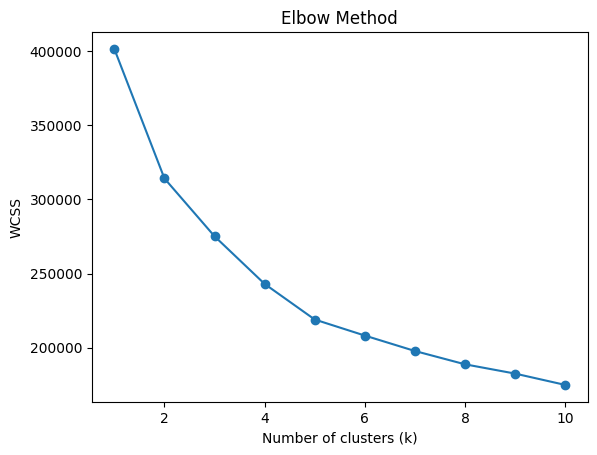

In [154]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

### Reduce Features using PCA
The dataset has several features. To imporve clustering performance, PCA was applied. Components were selected based on explained variance >= 90%. This reduces dimensionality while retaining most of the information

In [155]:
## Choosing number of components
pca = PCA(random_state=123, svd_solver='full')
pca.fit(df_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
reqd_expl_var = 0.9
reqd_n_comp = np.argmax(cumsum >= reqd_expl_var) + 1
print("The number of principal components required to preserve {}% of explained variance is {}".\
format(reqd_expl_var*100, reqd_n_comp))

The number of principal components required to preserve 90.0% of explained variance is 5


In [156]:
pca = PCA(n_components=reqd_n_comp, random_state=42)
df_pca = pca.fit_transform(df_scaled)

In [157]:
df_pca.shape

(68250, 5)

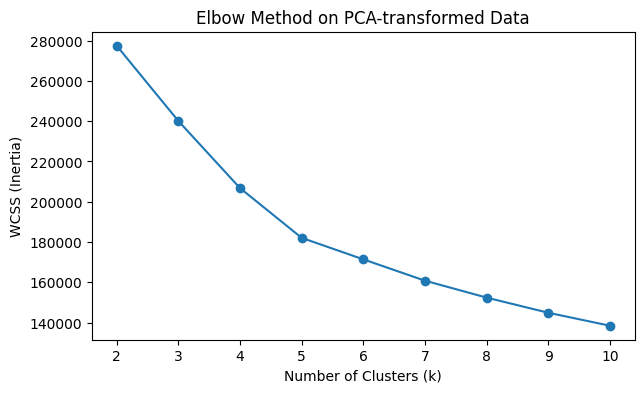

In [158]:
# Finding optimal k using data after pca

wcss = []
K = range(2, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method on PCA-transformed Data")
plt.show()

## Training Model

### Train model with k=5

In [159]:
df_clean.shape

(68250, 8)

In [160]:
df_with_clusters = df_clean.copy()

In [161]:
model_k5 = KMeans(n_clusters=5, random_state=42)
cluster_labels_k5 = model_k5.fit_predict(df_pca)
df_with_clusters['Cluster'] = cluster_labels_k5

## Interpretasi Model

### creating cluster images

In [162]:
# mengubah scaled data ke 2 dimensi dengan pca
pca_2 = PCA(n_components=2)
df_pca_2 = pca_2.fit_transform(df_scaled)
df_pca_2 = pd.DataFrame(data=df_pca_2, columns=['PC1', 'PC2'])
df_pca_2['Cluster'] = cluster_labels_k5

In [163]:
# function untuk pca, cluster label, dan centroid information untuk visualize the clusters
def plot_cluster_solution(df_pca, cluster_labels, centroids, title, custom_colors):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=cluster_labels, palette=custom_colors, alpha=0.5)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(False)
    plt.tight_layout()
    sns.scatterplot(x=centroids[:, 0], y=centroids[:,1], markers='x', s=250, color='red', label='Centroids')
    plt.legend(title='Cluster Label')
    plt.show()

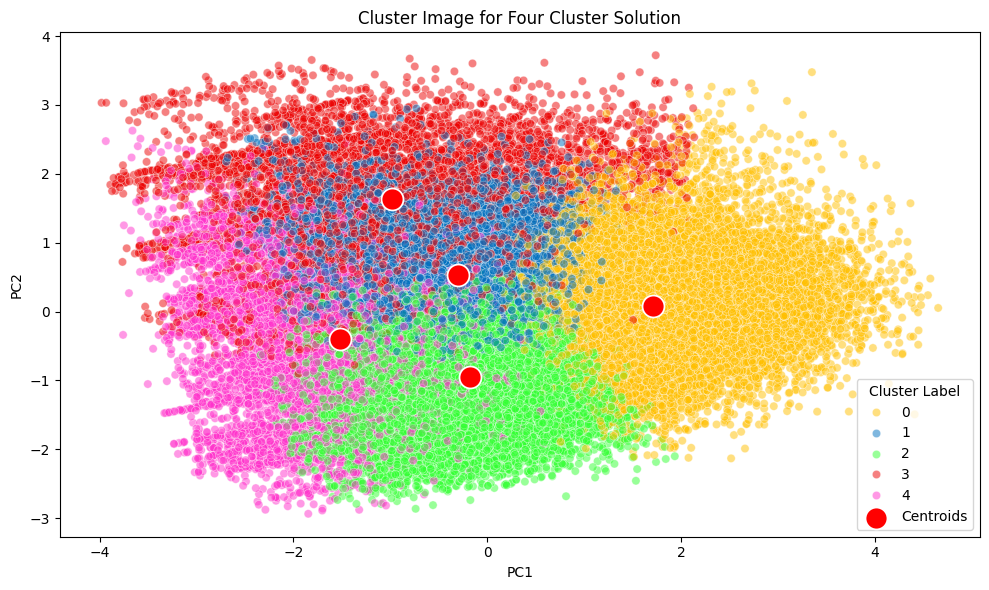

In [164]:
custom_color = ['#ffc000', '#0070c0', "#33ff33", "#ec0202", '#ff33cc']
plot_cluster_solution(df_pca_2, 'Cluster', model_k5.cluster_centers_, 'Cluster Image for Four Cluster Solution', custom_color)

### Visualization Cluster

In [165]:
df_with_clusters.head()

,Customer_ID,Avg_Ratings,Recency,Frequency,Monetary,Age,Gender,Income,Cluster
0,37249.0,3.400000,24,5,6485.389528,19.0,Male,High,0
1,69749.0,2.800000,1,5,4089.881243,20.0,Male,Low,0
2,30192.0,4.000000,128,4,7337.481177,19.0,Male,Low,0
3,27901.0,1.333333,28,3,1334.931576,22.0,Male,Low,2
4,41289.0,3.666667,93,3,7067.881229,20.0,Male,Medium,1


In [166]:
income_prop = (
    df_with_clusters.groupby(['Cluster', 'Income'])
    .size()
    .reset_index(name='Count')
)

# Hitung proporsi dengan transform (index tetap rapi)
income_prop['Proportion'] = (
    income_prop['Count'] / income_prop.groupby('Cluster')['Count'].transform('sum')
)

income_prop

,Cluster,Income,Count,Proportion
0,0,High,4965,0.272368
1,0,Low,5857,0.321301
2,0,Medium,7407,0.406331
3,1,High,5399,0.345802
4,1,Low,4646,0.297573
5,1,Medium,5568,0.356626
6,2,High,6569,0.393990
7,2,Low,4279,0.256642
8,2,Medium,5825,0.349367
9,3,High,1729,0.265877


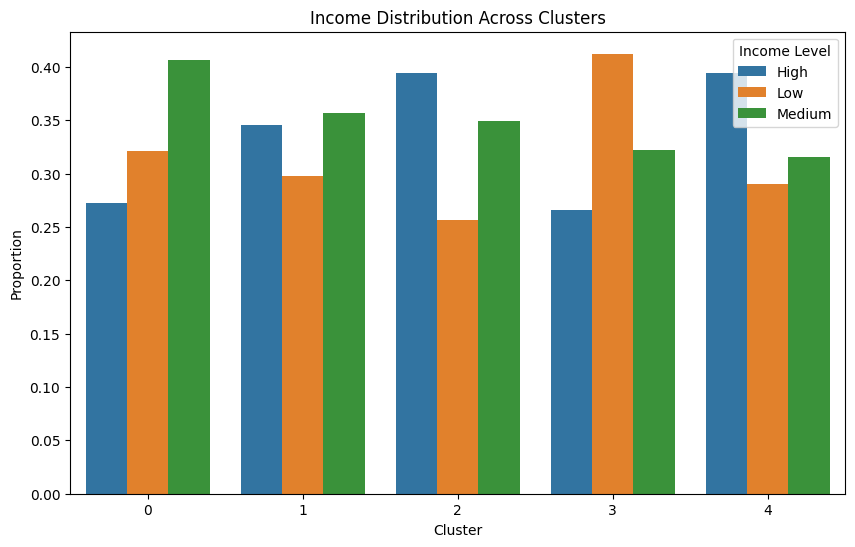

In [167]:
plt.figure(figsize=(10,6))
sns.barplot(data=income_prop, x='Cluster', y='Proportion', hue='Income')
plt.title("Income Distribution Across Clusters")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(title="Income Level")
plt.show()

In [168]:
gender_prop = (
    df_with_clusters.groupby(['Cluster', 'Gender'])
    .size()
    .reset_index(name='Count')
)

# Hitung proporsi dengan transform (index tetap rapi)
gender_prop['Proportion'] = (
    gender_prop['Count'] / gender_prop.groupby('Cluster')['Count'].transform('sum')
)

gender_prop


,Cluster,Gender,Count,Proportion
0,0,Female,6320,0.346700
1,0,Male,11909,0.653300
2,1,Female,6753,0.432524
3,1,Male,8860,0.567476
4,2,Female,7231,0.433695
5,2,Male,9442,0.566305
6,3,Female,3048,0.468707
7,3,Male,3455,0.531293
8,4,Female,5075,0.451834
9,4,Male,6157,0.548166


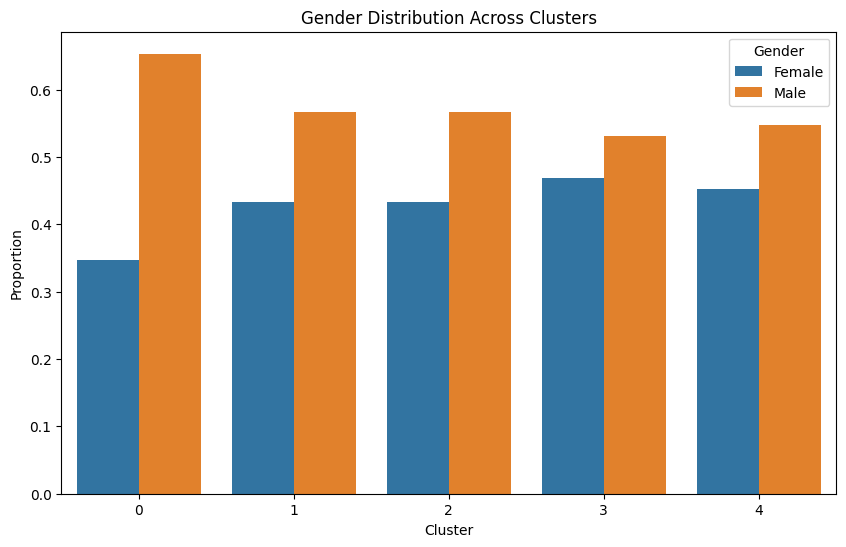

In [169]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_prop, x='Cluster', y='Proportion', hue='Gender')
plt.title("Gender Distribution Across Clusters")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(title="Gender")
plt.show()

In [170]:
numeric_cols = ["Age","Recency","Frequency","Monetary","Avg_Ratings"]

# Hitung rata-rata per cluster
cluster_means = df_with_clusters.groupby("Cluster")[numeric_cols].mean()

cluster_means

,Age,Recency,Frequency,Monetary,Avg_Ratings
Cluster,,,,,
0,21.242690,55.884305,5.342312,8003.145086,3.118512
1,21.480241,63.089669,3.073721,3626.523092,3.854808
2,21.245967,64.519403,3.004798,3598.285473,2.451681
3,33.009534,98.108104,2.926034,3900.685127,3.338770
4,21.884170,208.578704,2.344373,3024.170884,3.184836


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24384\2281558885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.index, y=cluster_means[col], ax=axes[i], palette="tab10")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24384\2281558885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.index, y=cluster_means[col], ax=axes[i], palette="tab10")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24384\2281558885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.index, y=cluster_means[col], ax=axes[i], 

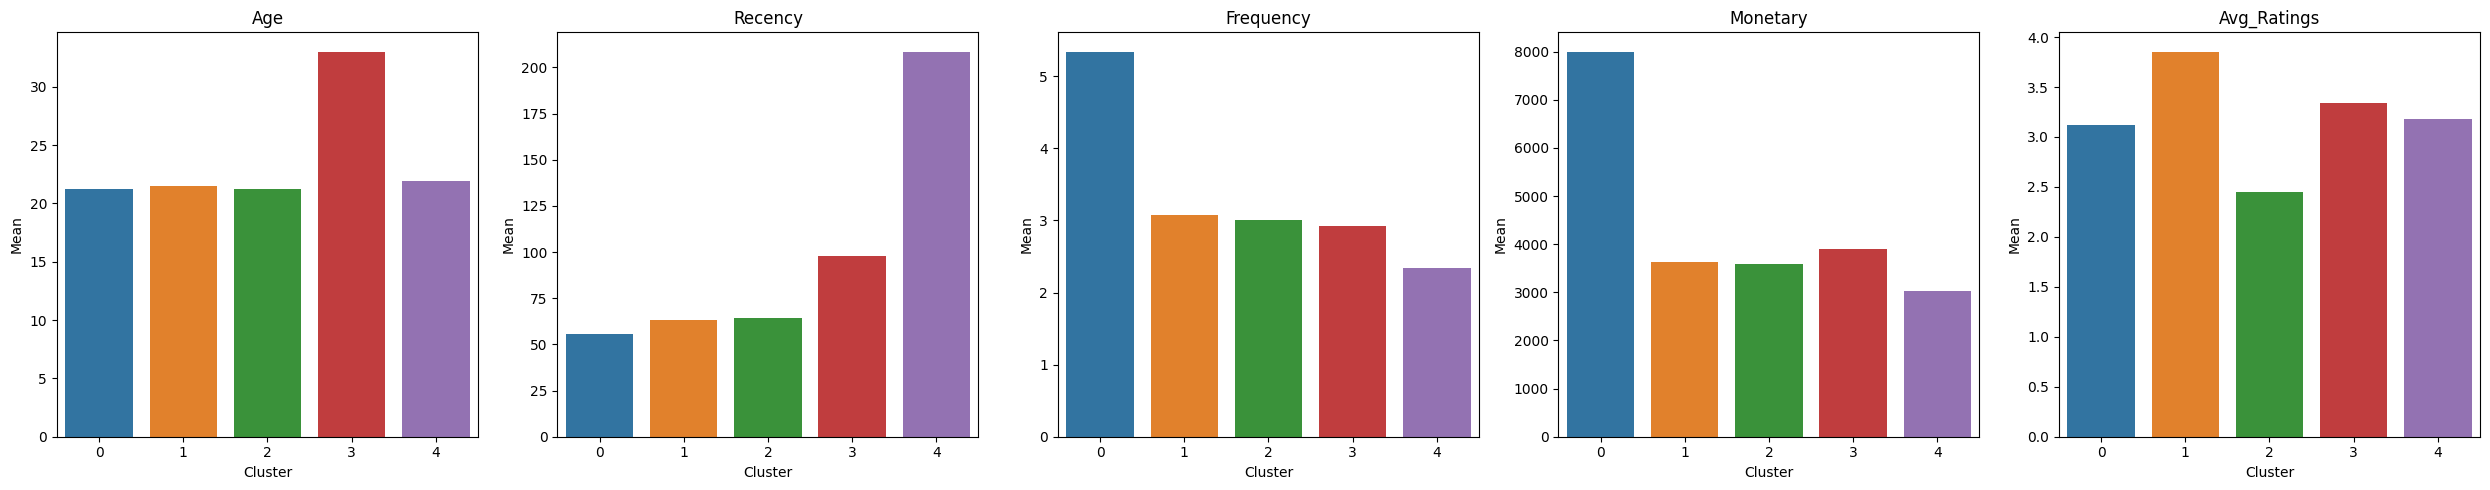

In [171]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,5))

for i, col in enumerate(numeric_cols):
    sns.barplot(x=cluster_means.index, y=cluster_means[col], ax=axes[i], palette="tab10")
    axes[i].set_title(col)
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel("Mean")

plt.tight_layout()
plt.show()


## Insight

### Cluster 0 - Young, Highly Active, High Spending Customer
- income : Medium
- Gender : Male
- Age : 21
- Recency : 56
- Frequency :5 
- Monetary : 8003 
- Avg_Ratings : 3

insight:

These are younger customer who purchase frequently and spend a significantly high amount. They may represent loyal and engaged buyers who return regularly and contribute major revenue

### Cluster 1 - Young, Low Frequency, moderate spending customers
- income : Medium
- Gender : Male
- Age : 21
- Recency : 63
- Frequency :3 
- Monetary : 3626 
- Avg_Ratings : 4

Insight:

Young customers with moderat recency, low purchase frequency, and mid level spending, but they give higher product ratings, indicating good satisfaction even though they buy less often

### Cluster 2 - Young, High Income, Low Frequency customers
- income : High
- Gender : Male
- Age : 21
- Recency : 65
- Frequency : 3
- Monetary : 3598
- Avg_Ratings : 2

Insight:

High income young customers who do not purchase frequently and tend to give low ratings. This cluster may represent unsatisfied high income users, a high risk grop worth targeting with improved service or personalized offers

### Cluster 3 - Older, Low Income, Low Frequency customers
- income : Low
- Gender : Male
- Age : 33
- Recency : 98
- Frequency : 3
- Monetary : 3900
- Avg_Ratings : 3

Insight:

An older demographic with low income and log inactivity. They show low engagement and might require reactivation campaigns or discounts to stimulate purchasing.

### Cluster 4 - Young, High Income, Low Inactivity Customers
- income : High
- Gender : Male
- Age : 22
- Recency : 208
- Frequency : 2
- Monetary : 3024
- Avg_Ratings : 3

Insight:

Customers who rarely shop and have not returned for a long time, despite being mostly high income. This cluster is ideal for retargeting campaigns, exclusive promotions, or loyality incentives